In [5]:
import os
import umps


In [6]:
import torchvision
import torchvision.transforms as transforms
import torch
import torch.utils.data

# def embedding_pixel(batch, label: int = 0):
#     pixel_size = batch.shape[-1] * batch.shape[-2]
#     x = batch.view(*batch.shape[:-2], pixel_size)
#     # x[:] = 0
#     x = torch.stack([x, 1-x], dim=-1)
#     # x = x / torch.sum(x, dim=-1).unsqueeze(-1)
#     x = x / torch.norm(x, dim=-1).unsqueeze(-1)
#     return x

# def embedding_label(labels: torch.Tensor):
#     emb = torch.zeros(labels.shape[0], 2)
#     emb[torch.arange(labels.shape[0]), labels] = 1
#     return emb

# def filiter_single_channel(batch):
#     return batch[0, ...]

# def filter_dataset(dataset, allowed_digits=[0, 1]):
#     indices = []
#     for i in range(len(dataset)):
#         _, label = dataset[i]
#         if label in allowed_digits:
#             indices.append(i)
#     return torch.utils.data.Subset(dataset, indices)

# img_size = 16
# transform = transforms.Compose([
#     transforms.Resize(img_size),
#     transforms.ToTensor(),
#     transforms.Lambda(filiter_single_channel),
#     transforms.Lambda(embedding_pixel),
# ])

# trainset = torchvision.datasets.QMNIST(
#     root="data",
#     train=True,
#     download=True,
#     transform=transform
# )

# trainset = filter_dataset(trainset, allowed_digits=[0, 1])

# trainloader = torch.utils.data.DataLoader(
#     trainset,
#     batch_size=128,
#     shuffle=True,
# )


In [7]:
import unitary_optimizer
umpsm = umps.uMPS(N = 16 * 16, chi = 2, d = 2, l = 2, layers = 1, device = "cpu")


Path is not set, setting...
Found the path
Initialized MPS unitaries


In [8]:
def loss_batch(outputs, labels):
    device = outputs.device
    loss = torch.zeros(1, device=device, dtype=torch.float64)

    for i in range(len(outputs)):
        prob = outputs[i] if labels[i] == 0 else 1 - outputs[i]
        loss -= torch.log(prob + 1e-8)
    return loss

def calculate_accuracy(outputs, labels):
    predictions = (outputs < 0.5).float()
    correct = (predictions == labels).float().sum()
    accuracy = correct / labels.numel()
    return accuracy.item()

In [14]:
data[0]

tensor([[1., 0.],
        [0., 0.]])

In [ ]:
data

In [49]:
N = 10
umpsm = umps.uMPS(N = N, chi = 2, d = 2, l = 2, layers = 1, device = "cpu")

# data, target = next(iter(trainloader))
# data = data.permute(1, 0, 2)

random_data = torch.randn(2, N, 2).permute(1, 0, 2)



data = torch.zeros(2, N, 2)
data[:, :, 0] = 1
data[0, 0, 0] = 0
data[0, 0, 1] = 1

data = data.permute(1, 0, 2)
target = torch.tensor([1, 0])

umpsm_op = unitary_optimizer.Adam(umpsm, lr=0.01)


grad_list = []
loss_list = []

for epoch in range(100):
    acc = 0
    umpsm_op.zero_grad()
    outputs = umpsm(data)
    loss = loss_batch(outputs, target)
    loss.backward()
    umpsm_op.step()

    # Calculate accuracy
    accuracy = calculate_accuracy(outputs, target)
    grad_list.append(umpsm.params[0].grad.norm().item())
    loss_list.append(loss.item())
    print(f"Accuracy: {accuracy:.4f}")
    print(f"loss: {loss.item()}")

Path is not set, setting...
Found the path
Initialized MPS unitaries
Accuracy: 0.5000
loss: 1.8339595450895205
Accuracy: 0.5000
loss: 1.7717116837939884
Accuracy: 0.5000
loss: 1.7139105093797387
Accuracy: 0.5000
loss: 1.6607671020378618
Accuracy: 0.5000
loss: 1.6124096844093225
Accuracy: 0.5000
loss: 1.5688925223059171
Accuracy: 0.5000
loss: 1.5301910112675878
Accuracy: 0.5000
loss: 1.4962045133932398
Accuracy: 0.5000
loss: 1.4667622956626247
Accuracy: 0.5000
loss: 1.4416295769373044
Accuracy: 0.5000
loss: 1.4205109920688987
Accuracy: 0.5000
loss: 1.4030512143136624
Accuracy: 0.5000
loss: 1.3888346056023284
Accuracy: 0.5000
loss: 1.3773859165422224
Accuracy: 0.5000
loss: 1.3681751066031582
Accuracy: 0.5000
loss: 1.3606305961861058
Accuracy: 1.0000
loss: 1.3541558608019504
Accuracy: 0.5000
loss: 1.3481400832170458
Accuracy: 0.5000
loss: 1.3419754243155881
Accuracy: 0.5000
loss: 1.3350921976216346
Accuracy: 0.5000
loss: 1.3270013156582656
Accuracy: 0.5000
loss: 1.317337022930927
Accuracy

In [55]:
2**8

256

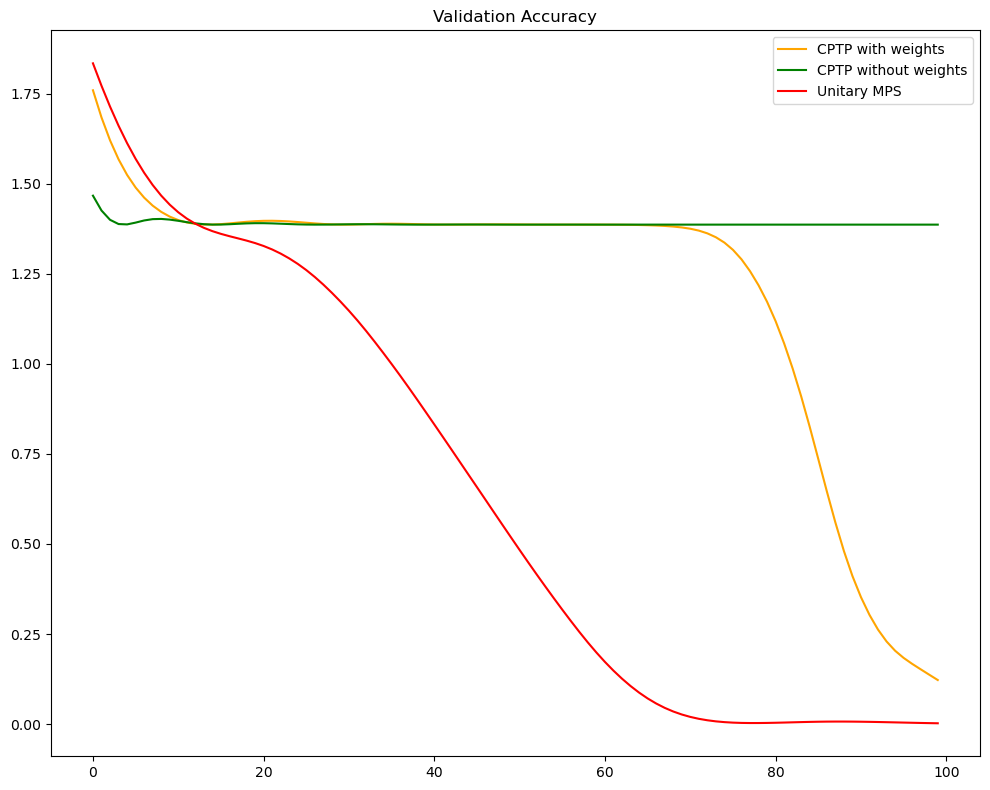

In [54]:
fig, ax = plt.subplots(figsize=(10, 8))
ax.plot(loss2, label='CPTP with weights', color="orange")
ax.plot(loss1, label='CPTP without weights', color = "green")
ax.plot(loss3, label='Unitary MPS', color='red')
ax.set_title('Validation Accuracy')
ax.legend()
plt.tight_layout()
plt.show()



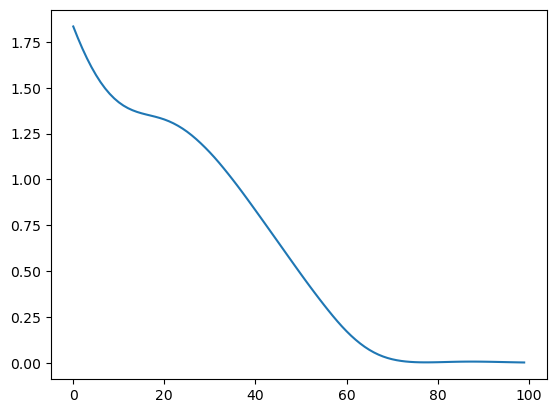

In [51]:
from matplotlib import pyplot as plt
plt.plot(loss_list)

# loss1 = loss_list
# loss2 = loss_list
loss3 = loss_list

In [17]:
umpsm = umps.uMPS(N = 16 * 16, chi = 2, d = 2, l = 2, layers = 1, device = "cpu")
umpsm_op = unitary_optimizer.Adam(umpsm, lr=0.01)
loss_list = []

for epoch in range(100):
    acc = 0
    for data, target in trainloader:    
        data = data.permute(1, 0, 2)
        umpsm_op.zero_grad()
        outputs = umpsm(data)
        loss = loss_batch(outputs, target)
        loss.backward()
        loss_list.append(loss.item())
        umpsm_op.step()

        # Calculate accuracy
        accuracy = calculate_accuracy(outputs, target)
        # print(f"Accuracy: {accuracy:.4f}")
        acc += accuracy
    acc /= len(trainloader)
    print(f"Accuracy: {acc:.4f}")
    print(f"loss: {loss.item()}")
    # print("grad", umpsm.params[-1].grad)







Path is not set, setting...
Found the path
Initialized MPS unitaries
Accuracy: 0.5246
loss: 83.54784204581831
Accuracy: 0.5684
loss: 73.04308383504777
Accuracy: 0.8519
loss: 31.90309277716292
Accuracy: 0.9429
loss: 22.171514428521775
Accuracy: 0.9600
loss: 15.972397083914712
Accuracy: 0.9692
loss: 17.40571249921043
Accuracy: 0.9702
loss: 15.372441945206177
Accuracy: 0.9719
loss: 18.649134697293185
Accuracy: 0.9751
loss: 16.543205827370603
Accuracy: 0.9767
loss: 14.152450075094164
Accuracy: 0.9781
loss: 15.336851422755482
Accuracy: 0.9772
loss: 20.23728257873542
Accuracy: 0.9788
loss: 21.27974344307868
Accuracy: 0.9784
loss: 16.72733288661953
Accuracy: 0.9773
loss: 17.90695587812768
Accuracy: 0.9781
loss: 12.667217996066395
Accuracy: 0.9779
loss: 13.87811907180931
Accuracy: 0.9799
loss: 14.92946632646441
Accuracy: 0.9799
loss: 12.270524097821557
Accuracy: 0.9808
loss: 11.934429580253493
Accuracy: 0.9811
loss: 10.773320167641335
Accuracy: 0.9811
loss: 13.200370005147482
Accuracy: 0.9808


KeyboardInterrupt: 

(tensor([[0.0000, 1.0000],
         [0.0000, 1.0000],
         [0.0000, 1.0000],
         [0.0000, 1.0000],
         [0.0000, 1.0000],
         [0.0000, 1.0000],
         [0.0000, 1.0000],
         [0.0000, 1.0000],
         [0.0000, 1.0000],
         [0.0000, 1.0000],
         [0.0000, 1.0000],
         [0.0000, 1.0000],
         [0.0000, 1.0000],
         [0.0000, 1.0000],
         [0.0000, 1.0000],
         [0.0000, 1.0000],
         [0.0000, 1.0000],
         [0.0000, 1.0000],
         [0.0000, 1.0000],
         [0.0000, 1.0000],
         [0.0000, 1.0000],
         [0.0000, 1.0000],
         [0.0000, 1.0000],
         [0.0000, 1.0000],
         [0.0000, 1.0000],
         [0.0000, 1.0000],
         [0.0000, 1.0000],
         [0.0000, 1.0000],
         [0.0000, 1.0000],
         [0.0000, 1.0000],
         [0.0000, 1.0000],
         [0.0000, 1.0000],
         [0.0000, 1.0000],
         [0.0000, 1.0000],
         [0.0000, 1.0000],
         [0.0000, 1.0000],
         [0.0000, 1.0000],
 

In [28]:
import tpcp_mps
import simple_mps
from importlib import reload

reload(tpcp_mps)
reload(simple_mps)

def accuracy(outputs, target):
    return (outputs.argmax(dim=-1) == target).float().mean()

logsoftmax = torch.nn.LogSoftmax(dim=-1)
nnloss = torch.nn.NLLLoss(reduction="mean")

smps = simple_mps.SimpleMPS(N=16*16, d=2, l=2, chi = 2, layers = 1)
# data, target = next(iter(trainloader))
# data = data.permute(1, 0, 2)
optimizer = torch.optim.Adam(smps.parameters(), lr=0.001)

loss_list = []
accuracy_list = []
loss_list_smps = []
for epoch in range(10000):
    for data, target in trainloader:
        data = data.permute(1, 0, 2)
        optimizer.zero_grad()
        outputs = smps(data)
        outpus = logsoftmax(outputs)
        loss = nnloss(outpus, target)
        loss.backward()
        loss_list.append(loss.item())
        optimizer.step()
        acc = accuracy(outputs, target)

        accuracy_list.append(acc)
        loss_list_smps.append(loss.item())
    acc = sum(accuracy_list) / len(accuracy_list)
    loss = sum(loss_list_smps) / len(loss_list_smps)
    print(f"Accuracy: {acc:.4f}")
    print(f"loss: {loss:.4f}")





Path is not set, setting...
Found the path
Initialized MPS with random matrices
Accuracy: 0.4824
loss: 456.9633
Accuracy: 0.4750
loss: 260.3066
Accuracy: 0.4726
loss: 179.8353
Accuracy: 0.4751
loss: 135.5730
Accuracy: 0.4977
loss: 108.5903
Accuracy: 0.5213
loss: 90.5825
Accuracy: 0.5411
loss: 77.7093
Accuracy: 0.5575
loss: 68.0631
Accuracy: 0.5802
loss: 60.5470
Accuracy: 0.6043
loss: 54.5324
Accuracy: 0.6292
loss: 49.6098
Accuracy: 0.6512
loss: 45.5067
Accuracy: 0.6733
loss: 42.0333
Accuracy: 0.6934
loss: 39.0553
Accuracy: 0.7123
loss: 36.4738
Accuracy: 0.7293
loss: 34.2140
Accuracy: 0.7446
loss: 32.2198
Accuracy: 0.7584
loss: 30.4466
Accuracy: 0.7708
loss: 28.8597
Accuracy: 0.7821
loss: 27.4312
Accuracy: 0.7922
loss: 26.1383
Accuracy: 0.7981
loss: 24.9650
Accuracy: 0.8043
loss: 23.8963
Accuracy: 0.8124
loss: 22.9117
Accuracy: 0.8197
loss: 22.0056
Accuracy: 0.8148
loss: 22.9318
Accuracy: 0.8019
loss: 22.1614
Accuracy: 0.7899
loss: 21.4024
Accuracy: 0.7788
loss: 20.6860
Accuracy: 0.7685